In [2]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

# Pregunta 1.

Tomamos la base de datos reducida (desde el año 2008 al año 2017) para mejorar la rapidez del script.
Sin embargo este script es capaz de leer toda la base de dato es decir desde el año 1990 al año 2017.

In [3]:
# En el caso que deseen leer los archivos desde el 90 al 95 lo pueden hacer descomentando el siguiente código:
# path = r'tu_path'
# df_90_95 = (pd.concat(map(pd.read_csv,
#                           glob.glob(os.path.join('', "tu_path/*.csv")))))

# Creo el df con los csv restantes no utf-8 y separados por ;
path_96_2017 = r'E:\driveudd\MDS\Limpieza_de_datos\Tarea-2\nacimientos\nacimientos'
todos_los_csv_96_2017 = glob.glob(os.path.join(path_96_2017, "*.csv"))

df_de_cada_archivo_96_2017 = (pd.read_csv(f, sep=';', encoding='latin1')
                              for f in todos_los_csv_96_2017)
df_general = pd.concat(df_de_cada_archivo_96_2017, ignore_index=True)
df_general

<ipython-input-3-d6ddfdb89aca>:12: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  df_general = pd.concat(df_de_cada_archivo_96_2017, ignore_index=True)


,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,COMUNA,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA
0,1,4,1,2008,1,2,1,36,2930,47,...,13401,1,1,0.0,0.0,1,13,13,HOSPITAL EL PINO,NaN
1,1,5,1,2008,1,2,1,37,3945,51,...,13115,1,4,0.0,0.0,4,13,12,CLINICA ALEMANA,NaN
2,1,1,1,2008,1,1,1,41,2940,49,...,5101,1,1,0.0,0.0,1,5,6,HOSPITAL CARLOS VAN BUREN,NaN
3,1,4,1,2008,1,2,1,39,2950,49,...,5106,1,1,0.0,0.0,1,5,7,HOSPITAL DE QUILPUE,NaN
4,2,4,1,2008,1,2,1,37,3070,48,...,2101,1,2,0.0,0.0,2,2,3,Clinica de la Mujer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429059,2,16,12,2017,1,1,1,37,2735,48,...,13301,1,2,0.0,0.0,2,13,9,Clinica Indisa,C
2429060,2,30,12,2017,9,9,2,99,9999,99,...,13125,1,99,99.0,99.0,2,13,9,Partos en Domicilio,C
2429061,2,15,12,2017,1,1,1,38,3860,50,...,13125,1,99,99.0,99.0,3,13,9,Clinica Santa Maria,C
2429062,2,29,12,2017,1,2,9,39,3370,48,...,6117,1,1,0.0,0.0,1,6,15,Sin Especificar,


In [4]:
# Reviso las columnas y tipo de datos
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429064 entries, 0 to 2429063
Data columns (total 33 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SEXO        int64  
 1   DIA_NAC     int64  
 2   MES_NAC     int64  
 3   ANO_NAC     int64  
 4   TIPO_PARTO  int64  
 5   ATENC_PART  int64  
 6   LOCAL_PART  int64  
 7   SEMANAS     int64  
 8   PESO        int64  
 9   TALLA       int64  
 10  EDAD_P      float64
 11  CURSO_P     float64
 12  NIVEL_P     float64
 13  ACTIV_P     int64  
 14  OCUPA_P     object 
 15  CATEG_P     int64  
 16  EDAD_M      int64  
 17  EST_CIVI_M  int64  
 18  CURSO_M     int64  
 19  NIVEL_M     int64  
 20  ACTIV_M     int64  
 21  OCUPA_M     object 
 22  CATEG_M     int64  
 23  COMUNA      int64  
 24  URBA_RURAL  int64  
 25  HIJ_VIVOS   int64  
 26  HIJ_FALL    float64
 27  HIJ_MORT    float64
 28  HIJ_TOTAL   int64  
 29  REG_RES     int64  
 30  SERV_RES    int64  
 31  ESTAB       object 
 32  NAC_MA      object 
dtypes: floa

# Pregunta 2.

Con el uso de value_counts() podemos obtener el mes con el mayor número de cumpleaños dando como resultado el mes
de Enero con 213.303 nacimientos. Esto quiere decir, que si consideramos un plazo normal de embarazo de 9 meses, el
mes de mayor concepción es Abril, a inicios de la temporada de Otoño de cada año.

In [5]:
df_general.MES_NAC.value_counts()

1     213303
3     212808
9     206195
12    203226
5     202720
7     202287
4     201891
10    201783
8     200377
6     199799
11    194104
2     190571
Name: MES_NAC, dtype: int64

# Pregunta 3.

El día con más cumpleaños es el 15 de Septiembre con 7.864 cumpleaños. Acá también se puede dar la respuesta
considerando sólo el día con más nacimiento, sin considerar el mes, cuyo resultado o moda es el día 14.

In [6]:
# Creo una nueva columna llamada cumpleanos y le aplico value.counts().

df_general['DIA_NAC'] = df_general['DIA_NAC'].astype(str)
df_general['MES_NAC'] = df_general['MES_NAC'].astype(str)
df_general['cumpleano'] = (df_general['DIA_NAC'] + '-' + df_general['MES_NAC'])
df_general.cumpleano.value_counts()
print('El dia sin considerar el mes de más nacimientos es,', df_general.DIA_NAC.mode())

El dia sin considerar el mes de más nacimientos es, 0    14
dtype: object


# Pregunta 4.

La correlación general entre PESO y TALLA para los años estudiados es de 0.77 lo que indica una muy buena correlación,
es decir, se explica en un 77% el cambio de una variable con relación a la otra. En palabras más simples si se aumenta o
baja en peso, se aumenta o baja en talla.

Con respecto a la covarianza podemos que el valor es 1713, que al ser un valor mayor que cero indica una relación líneal
directa o positiva entre ambas variables. En otras palabras tienden a aumentar o disminuir  a la vez.

La correlación a lo largo de los años estudiados no cambia mayormente. Sin embargo llama la atención el año 2010 y 2011
en donde la correlación entre ambas variables es de 0,85 y 0,82, lo que podría implicar que los datos fueron tomados de
una manera más exacta; ya que es lógico que exista una correlación entre peso y talla.

La covarianza a los largo de los años no sufre mayores variaciones, sin embargo en los años indicados en el párrafo
anterior, también tienen variaciones importantes.

In [7]:
# Uso la función .corr()
corr_p_t_general = df_general[['PESO', 'TALLA']].corr('spearman')
corr_p_t_general

,PESO,TALLA
PESO,1.000000,0.770172
TALLA,0.770172,1.000000


In [8]:
corr_p_t_x_ano = df_general.groupby('ANO_NAC')[['PESO', 'TALLA']].corr('spearman')
corr_p_t_x_ano

PESO     TALLA
ANO_NAC                          
2008    PESO   1.000000  0.765152
        TALLA  0.765152  1.000000
2009    PESO   1.000000  0.771860
        TALLA  0.771860  1.000000
2010    PESO   1.000000  0.856447
        TALLA  0.856447  1.000000
2011    PESO   1.000000  0.825524
        TALLA  0.825524  1.000000
2012    PESO   1.000000  0.777406
        TALLA  0.777406  1.000000
2013    PESO   1.000000  0.775318
        TALLA  0.775318  1.000000
2014    PESO   1.000000  0.761284
        TALLA  0.761284  1.000000
2015    PESO   1.000000  0.756592
        TALLA  0.756592  1.000000
2016    PESO   1.000000  0.753429
        TALLA  0.753429  1.000000
2017    PESO   1.000000  0.763278
        TALLA  0.763278  1.000000

In [9]:
cov_p_t_general = df_general[['PESO', 'TALLA']].cov()
cov_p_t_general

,PESO,TALLA
PESO,378038.122419,1713.520425
TALLA,1713.520425,10.687249


In [10]:
cov_p_t_x_ano = df_general.groupby('ANO_NAC')[['PESO', 'TALLA']].cov()
cov_p_t_x_ano

PESO        TALLA
ANO_NAC                                  
2008    PESO   338767.176400  1401.877499
        TALLA    1401.877499     8.282141
2009    PESO   387941.648751  1750.969411
        TALLA    1750.969411    10.745975
2010    PESO   360825.816377  1543.489951
        TALLA    1543.489951     8.598333
2011    PESO   369393.255109  1647.849752
        TALLA    1647.849752     9.560016
2012    PESO   366359.490131  1625.551747
        TALLA    1625.551747     9.677812
2013    PESO   375243.926160  1682.337026
        TALLA    1682.337026    10.104700
2014    PESO   403008.379573  1895.742424
        TALLA    1895.742424    12.608091
2015    PESO   390706.471052  1860.608625
        TALLA    1860.608625    12.203466
2016    PESO   405387.317686  1941.534022
        TALLA    1941.534022    13.262913
2017    PESO   383735.626577  1791.252917
        TALLA    1791.252917    11.297661

# Pregunta 5.

La correlación para la Edad del Padre y de la Madre es de 0.55, no es una mala correlación sin embargo no es excelente,
por lo tanto sólo podríamos decir que la edad del Padre se explica en un 55% según la edad de la Madre.

Con respecto a la covarianza de 19.44 es mayor que cero por lo que indica relación de linealidad entre ambas variables.

La correlación en el transcurso de los años no varía mayormente, lo que indica que la correlación se mantiene en un
rango del 0.51 al 0.55. Es preciso mencionar que existe una correlación atípica de 0.68 para el año 2013.

La covarianza también tiene poca variación, va desde los valores 14 al 18 aproximadamente, al ser positiva, indica
que ambas variables tienden a aumentar o disminuir a la vez.

In [11]:
corr_ep_em_general = df_general[['EDAD_P', 'EDAD_M']].corr('spearman')
corr_ep_em_general

,EDAD_P,EDAD_M
EDAD_P,1.000000,0.559136
EDAD_M,0.559136,1.000000


In [12]:
corr_ep_em_x_ano = df_general.groupby('ANO_NAC')[['EDAD_P', 'EDAD_M']].corr('spearman')
corr_ep_em_x_ano

EDAD_P    EDAD_M
ANO_NAC                           
2008    EDAD_P  1.000000  0.519163
        EDAD_M  0.519163  1.000000
2009    EDAD_P  1.000000  0.520158
        EDAD_M  0.520158  1.000000
2010    EDAD_P  1.000000  0.524838
        EDAD_M  0.524838  1.000000
2011    EDAD_P  1.000000  0.541606
        EDAD_M  0.541606  1.000000
2012    EDAD_P  1.000000  0.553726
        EDAD_M  0.553726  1.000000
2013    EDAD_P  1.000000  0.687833
        EDAD_M  0.687833  1.000000
2014    EDAD_P  1.000000  0.564582
        EDAD_M  0.564582  1.000000
2015    EDAD_P  1.000000  0.564959
        EDAD_M  0.564959  1.000000
2016    EDAD_P  1.000000  0.566833
        EDAD_M  0.566833  1.000000
2017    EDAD_P  1.000000  0.558044
        EDAD_M  0.558044  1.000000

In [13]:
cov_ep_em_general = df_general[['EDAD_P', 'EDAD_M']].cov()
cov_ep_em_general

,EDAD_P,EDAD_M
EDAD_P,452.738105,19.444422
EDAD_M,19.444422,46.357177


In [14]:
cov_ep_em_x_ano = df_general.groupby('ANO_NAC')[['EDAD_P', 'EDAD_M']].cov()
cov_ep_em_x_ano

EDAD_P     EDAD_M
ANO_NAC                              
2008    EDAD_P  525.329858  14.519631
        EDAD_M   14.519631  47.314459
2009    EDAD_P  527.470674  15.107356
        EDAD_M   15.107356  47.835074
2010    EDAD_P  522.162205  15.270721
        EDAD_M   15.270721  47.460879
2011    EDAD_P  501.743609  17.203417
        EDAD_M   17.203417  47.309110
2012    EDAD_P  484.862067  17.785136
        EDAD_M   17.785136  46.362002
2013    EDAD_P  139.594799  42.548848
        EDAD_M   42.548848  46.054538
2014    EDAD_P  449.797824  18.379954
        EDAD_M   18.379954  45.016727
2015    EDAD_P  439.202244  18.615096
        EDAD_M   18.615096  44.383152
2016    EDAD_P  417.434702  18.191721
        EDAD_M   18.191721  42.982503
2017    EDAD_P  413.811725  18.096970
        EDAD_M   18.096970  45.415079

# Pregunta 6.

Para considerar qué recién nacido pertenece a cuál categoría, este informe se basa en la información obtenida desde
la [Bibioteca Nacional de Medicina de los EE.UU](https://medlineplus.gov/spanish/ency/article/001562.htm).

Además de lo anterior se toma el supuesto que los valores de peso 9999 y talla 99 son un error del dataframe, por lo
que no se les considera para gráficos de tal manera de hacerlos entendibles.

En los gráficos podemos notar una gran presencia de outliers, lo que eventualmente podría distorcionar algunos
resultados, por lo que se recomienda un filtrado entre el quartil 1 y 3, sin embargo, como este informe es con
fines académicos, sólo consideramos descartar los valores indicados en el supuesto del párrafo anterior.

Además de lo anterior en el boxplot se pueden notar los rangos intercuartiles de cada variable estudiada, siendo
esta una importante herramienta para decidir cómo trabajar con la información.

In [15]:
prematuro = df_general.query('SEMANAS < 37 & PESO != 9999 & TALLA != 99')
prematuro.reset_index(inplace=True, drop=True)
prematuro

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano
0,1,4,1,2008,1,2,1,36,2930,47,...,1,1,0.0,0.0,1,13,13,HOSPITAL EL PINO,NaN,4-1
1,2,7,1,2008,1,2,1,35,2330,47,...,1,2,0.0,0.0,2,2,3,CLINICA ANTOFAGASTA,NaN,7-1
2,2,2,4,2008,1,2,1,35,2800,49,...,1,1,0.0,0.0,1,5,7,HOSPITAL DR. GUSTAVO FRICKE,NaN,2-4
3,2,5,4,2008,1,2,1,32,1770,43,...,1,1,0.0,0.0,1,8,19,HOSPITAL LAS HIGUERAS,NaN,5-4
4,2,1,4,2008,1,1,1,28,1150,36,...,1,1,0.0,0.0,1,13,14,Hospital Padre Hurtado,NaN,1-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188300,1,28,12,2017,1,2,1,36,2370,44,...,1,1,0.0,0.0,1,13,14,Hospital Clínico Metropolitano La Florida Dra,C,28-12
188301,1,14,12,2017,1,1,9,30,1308,40,...,1,2,0.0,0.0,2,13,13,Sin Especificar,,14-12
188302,1,26,12,2017,1,1,1,36,2270,46,...,1,3,0.0,0.0,3,13,13,HOSP CLINICO DE LA U CATOLICA,C,26-12
188303,1,31,12,2017,1,1,1,32,1850,42,...,1,1,0.0,0.0,1,13,12,CLINICA LAS CONDES,C,31-12


In [16]:
a_termino = df_general.query(
    'SEMANAS >= 37 & SEMANAS <= 42 & PESO != 9999 & TALLA != 99')
a_termino.reset_index(inplace=True, drop=True)
a_termino

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano
0,1,5,1,2008,1,2,1,37,3945,51,...,1,4,0.0,0.0,4,13,12,CLINICA ALEMANA,NaN,5-1
1,1,1,1,2008,1,1,1,41,2940,49,...,1,1,0.0,0.0,1,5,6,HOSPITAL CARLOS VAN BUREN,NaN,1-1
2,1,4,1,2008,1,2,1,39,2950,49,...,1,1,0.0,0.0,1,5,7,HOSPITAL DE QUILPUE,NaN,4-1
3,2,4,1,2008,1,2,1,37,3070,48,...,1,2,0.0,0.0,2,2,3,Clinica de la Mujer,NaN,4-1
4,1,3,1,2008,1,2,1,39,3260,48,...,2,1,0.0,0.0,1,7,16,HOSPITAL DE LINARES,NaN,3-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235345,1,28,12,2017,1,2,1,40,3735,52,...,1,3,0.0,0.0,3,8,20,HOSPITAL VICTOR RIOS RUIZ,C,28-12
2235346,2,16,12,2017,1,1,1,37,2735,48,...,1,2,0.0,0.0,2,13,9,Clinica Indisa,C,16-12
2235347,2,15,12,2017,1,1,1,38,3860,50,...,1,99,99.0,99.0,3,13,9,Clinica Santa Maria,C,15-12
2235348,2,29,12,2017,1,2,9,39,3370,48,...,1,1,0.0,0.0,1,6,15,Sin Especificar,,29-12


In [17]:
post_termino = df_general.query('SEMANAS > 42 & PESO != 9999 & TALLA != 99')
post_termino.reset_index(inplace=True, drop=True)
post_termino

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,URBA_RURAL,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano
0,1,3,1,2008,1,1,1,43,4820,52,...,1,3,0.0,0.0,3,9,21,HOSPITAL DE VILLARRICA,NaN,3-1
1,1,22,4,2008,1,2,1,43,4850,52,...,2,4,0.0,0.0,4,10,33,Hospital Quellon,NaN,22-4
2,1,6,5,2008,1,1,1,43,4864,53,...,1,3,0.0,0.0,3,13,11,HOSPITAL SAN BORJA ARRIARAN,NaN,6-5
3,2,7,5,2008,1,2,1,43,2840,49,...,1,1,0.0,0.0,1,12,26,CLINICA MAGALLANES,NaN,7-5
4,2,17,4,2008,1,1,1,43,4845,53,...,1,4,0.0,0.0,4,9,21,Hospital Dr.Hernan Henriquez A,NaN,17-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1,2,10,2016,1,2,1,43,3065,49,...,1,1,0.0,0.0,1,2,3,Clínica Cumbres del Norte S A,NaN,2-10
1273,2,15,9,2016,1,1,1,43,3280,51,...,1,2,0.0,0.0,2,13,13,HOSP PARROQUIAL SAN BERNARDO,NaN,15-9
1274,1,30,7,2016,1,2,1,43,3480,51,...,1,1,0.0,0.0,1,7,16,HOSPITAL DE LINARES,NaN,30-7
1275,1,16,7,2016,1,1,1,43,2060,43,...,1,1,0.0,0.0,1,4,5,HOSPITAL DR A TIRADO,NaN,16-7


D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


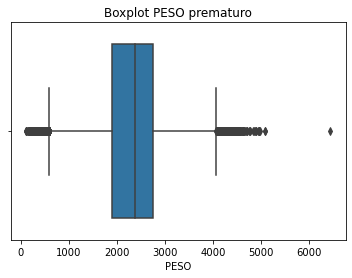

In [18]:
# Creando diagramas de BOX para el peso y la talla para las tres categorías anteriores
sns.boxplot(prematuro['PESO'])
plt.title('Boxplot PESO prematuro')
plt.show()

D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


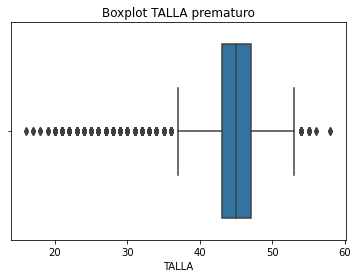

In [19]:
sns.boxplot(prematuro['TALLA'])
plt.title('Boxplot TALLA prematuro')
plt.show()

D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


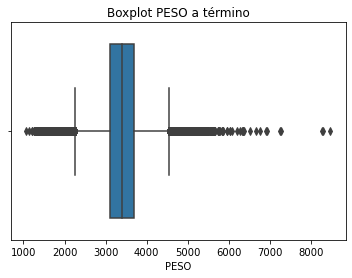

In [20]:
sns.boxplot(a_termino['PESO'])
plt.title('Boxplot PESO a término')
plt.show()

D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


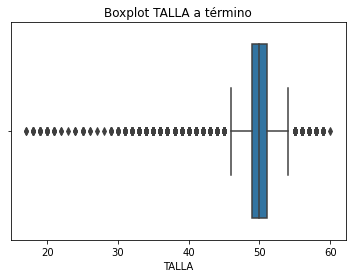

In [21]:
sns.boxplot(a_termino['TALLA'])
plt.title('Boxplot TALLA a término')
plt.show()

D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


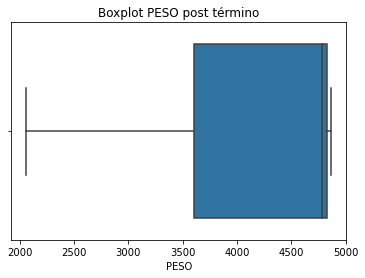

In [22]:
sns.boxplot(post_termino['PESO'])
plt.title('Boxplot PESO post término')
plt.show()

D:\anaconda3\envs\ML38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


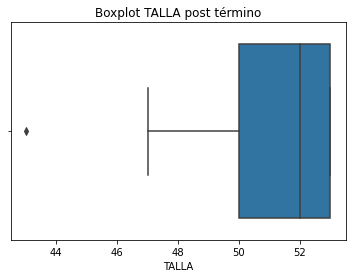

In [23]:
sns.boxplot(post_termino['TALLA'])
plt.title('Boxplot TALLA post término')
plt.show()

# Pregunta 7.

Para identificar el comportamiento de los outliers y los rangos IQ y su relación con las variables solicitadas
se realizan nuevos gráficos boxplot. Los que arrojan los siguientes resultados.

Podemos notar un comportamiento bastante similar para todas las variables, teniendo un Q2
en los mismos niveles. Se puede notar la presencia de outliers, en su mayoría en el indicador 1.

In [24]:
# Primero debo conocer las variables que componen la columna ESTAB para poder indicar un indicador que
# represente la clase a la cual pertenece.

cat_ESTAB = df_general.ESTAB.unique().T
cat_ESTAB

array(['HOSPITAL EL PINO', 'CLINICA ALEMANA', 'HOSPITAL CARLOS VAN BUREN',
       ..., 'AV LO ESPEJO 2891 (CESFAM PUEBLO LO ESPEJO)',
       'CONSULTORIO DR HECTOR REYNO ALTO HOSPICIO',
       'HOSPITAL SAN JUAN DE DIOS  CURICO'], dtype=object)

In [25]:
# Luego inicio la columna indicador y posteriormente le indico como quiero que se construya.
df_general['indicador'] = ' '
df_general.indicador = (np.where(df_general.ESTAB.isnull(), 0,
                                 (np.where((df_general.ESTAB.str.contains('TRAYECTO') | df_general.ESTAB.str.contains(
                                     'CAMINO')), 2,
                                           np.where(df_general.ESTAB.str.contains
                                                    ('AMBULANCIA'), 1, (np.where((df_general.ESTAB.str.contains
                                                                                  ('HOS') | df_general.ESTAB.str.contains
                                                                                  ('Hospital')), 3, (np.where(
                                               (df_general.ESTAB.str.contains
                                                ('CL') | df_general.ESTAB.str.contains
                                                ('Clinica') | df_general.ESTAB.str.contains
                                                ('Clínica')), 4, '5')))))))))

In [26]:
# Reviso que el grupo 1 esté bien identificado.
prueba_para_1 = df_general[(df_general.indicador == '1')]
prueba_para_1

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano,indicador
33100,1,21,6,2008,1,2,3,39,3180,49,...,2,0.0,0.0,2,7,16,AMBULANCIA SAMU LINARES,NaN,21-6,1
41809,2,8,2,2008,1,3,3,37,3100,48,...,2,0.0,0.0,2,10,33,AMBULANCIA ANCUD,NaN,8-2,1
55380,1,16,8,2008,9,9,3,99,9999,99,...,1,0.0,0.0,1,7,16,CONSULTORIO SAN CLEMENTE EN LA AMBULANCIA,NaN,16-8,1
64962,1,13,1,2008,1,3,3,39,3104,48,...,3,0.0,0.0,3,12,26,AMBULANCIA,NaN,13-1,1
78671,2,10,1,2008,1,2,3,38,3334,50,...,2,0.0,0.0,2,3,4,EN AMBULANCIA POBL.LA COLINA,NaN,10-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055224,2,22,6,2016,1,2,3,37,3460,50,...,4,0.0,0.0,4,14,22,AMBULANCIA,NaN,22-6,1
2136717,1,24,10,2016,1,3,3,38,3270,50,...,4,0.0,0.0,4,7,16,AMBULANCIA CURICO,NaN,24-10,1
2164517,2,2,3,2016,1,2,3,38,3200,49,...,2,0.0,0.0,2,8,17,AMBULANCIA FRENTE A TALQUIPEN COIHUECO,NaN,2-3,1
2199255,2,9,4,2016,1,1,3,38,2755,46,...,2,0.0,0.0,2,13,9,AMBULANCIA COLINA,NaN,9-4,1


In [27]:
# Reviso que el grupo 1 esté bien identificado.
prueba_para_2 = df_general[(df_general.indicador == '2')]
prueba_para_2

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano,indicador
70052,2,29,3,2008,1,2,3,37,2540,46,...,4,0.0,0.0,4,1,2,AMBULANCIA EN TRAYECTO,NaN,29-3,2
97422,2,24,5,2008,1,2,3,39,3212,50,...,4,0.0,0.0,4,3,4,TRAYECTO CALDERA COPIAPO EN AMBULANCIA KMT.8,NaN,24-5,2
154166,1,6,4,2008,1,3,3,39,3450,51,...,3,0.0,0.0,3,8,17,TRAYECTO EN AMBULANCIA,NaN,6-4,2
190624,1,22,7,2008,1,2,3,38,3668,49,...,2,0.0,0.0,2,3,4,PARTO EN AMBULANCIA TRAYECTO A COPIAPO KM 812,NaN,22-7,2
225866,2,10,12,2008,1,3,3,40,3866,49,...,4,0.0,0.0,4,12,26,TRAYECTO AL HOSPITAL,NaN,10-12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925214,2,8,7,2015,9,9,3,99,9999,99,...,5,0.0,0.0,5,10,33,EN TAXI TRAYECTO AL HOPITAL COMUNA DE CASTRO,NaN,8-7,2
1925755,2,6,3,2015,1,3,3,36,1934,42,...,3,0.0,0.0,3,3,4,TRAYECTO CARRERAS PINTO(AMBULANCIA) COPIAPO,NaN,6-3,2
1944650,2,5,3,2015,1,2,3,39,3110,48,...,1,0.0,0.0,1,3,4,AMBULANCIA EN TRAYECTO COPIAPO,NaN,5-3,2
1960957,1,30,5,2015,1,3,3,36,2950,48,...,3,1.0,0.0,4,8,20,TRAYECTO AL HOSPITAL DESDE CHACAYAL NORTE,NaN,30-5,2


In [28]:
# Reviso que el grupo 1 esté bien identificado.
prueba_para_3 = df_general[(df_general.indicador == '3')]
prueba_para_3

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano,indicador
0,1,4,1,2008,1,2,1,36,2930,47,...,1,0.0,0.0,1,13,13,HOSPITAL EL PINO,NaN,4-1,3
2,1,1,1,2008,1,1,1,41,2940,49,...,1,0.0,0.0,1,5,6,HOSPITAL CARLOS VAN BUREN,NaN,1-1,3
3,1,4,1,2008,1,2,1,39,2950,49,...,1,0.0,0.0,1,5,7,HOSPITAL DE QUILPUE,NaN,4-1,3
5,1,3,1,2008,1,2,1,39,3260,48,...,1,0.0,0.0,1,7,16,HOSPITAL DE LINARES,NaN,3-1,3
8,2,4,1,2008,1,2,1,37,2410,46,...,2,0.0,0.0,2,13,11,HOSPITAL SAN BORJA ARRIARAN,NaN,4-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429053,1,15,12,2017,1,1,1,40,2960,49,...,3,0.0,0.0,3,13,10,HOSPITAL FELIX BULNES,C,15-12,3
2429055,2,2,12,2017,1,1,1,40,3250,49,...,2,0.0,0.0,2,13,10,HOSPITAL FELIX BULNES,C,2-12,3
2429056,2,27,12,2017,1,1,1,36,2650,46,...,2,0.0,0.0,2,6,15,HOSPITAL DE SANTA CRUZ,C,27-12,3
2429058,1,28,12,2017,1,2,1,40,3735,52,...,3,0.0,0.0,3,8,20,HOSPITAL VICTOR RIOS RUIZ,C,28-12,3


In [29]:
# Reviso que el grupo 1 esté bien identificado.
prueba_para_4 = df_general[(df_general.indicador == '4')]
prueba_para_4

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano,indicador
1,1,5,1,2008,1,2,1,37,3945,51,...,4,0.0,0.0,4,13,12,CLINICA ALEMANA,NaN,5-1,4
4,2,4,1,2008,1,2,1,37,3070,48,...,2,0.0,0.0,2,2,3,Clinica de la Mujer,NaN,4-1,4
6,1,5,1,2008,1,1,1,40,3710,51,...,2,0.0,0.0,2,13,9,Clínica Dávila,NaN,5-1,4
7,2,3,1,2008,1,1,1,39,4330,52,...,1,0.0,0.0,1,13,9,Clinica Indisa,NaN,3-1,4
9,2,7,1,2008,1,1,1,38,3810,48,...,1,0.0,0.0,1,13,14,Clínica Dávila,NaN,7-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429046,1,29,12,2017,1,1,1,40,3575,49,...,1,0.0,0.0,1,13,13,NUEVA CLINICA MADRE E HIJO,C,29-12,4
2429048,1,26,11,2017,1,1,1,39,3645,52,...,1,0.0,0.0,1,8,19,Clinica Avant Salud Bio Bio,E,26-11,4
2429054,1,31,12,2017,1,1,1,32,1850,42,...,1,0.0,0.0,1,13,12,CLINICA LAS CONDES,C,31-12,4
2429059,2,16,12,2017,1,1,1,37,2735,48,...,2,0.0,0.0,2,13,9,Clinica Indisa,C,16-12,4


In [30]:
prueba_para_5 = df_general[(df_general.indicador == '5')]
prueba_para_5

,SEXO,DIA_NAC,MES_NAC,ANO_NAC,TIPO_PARTO,ATENC_PART,LOCAL_PART,SEMANAS,PESO,TALLA,...,HIJ_VIVOS,HIJ_FALL,HIJ_MORT,HIJ_TOTAL,REG_RES,SERV_RES,ESTAB,NAC_MA,cumpleano,indicador
30,1,5,4,2008,1,2,1,39,3770,50,...,1,0.0,0.0,1,8,18,SANATORIO ALEMAN,NaN,5-4,5
186,1,19,7,2008,2,1,1,35,2330,47,...,1,0.0,0.0,1,8,20,SANATORIO ALEMAN,NaN,19-7,5
187,2,19,7,2008,2,1,1,35,2260,47,...,2,0.0,0.0,2,8,20,SANATORIO ALEMAN,NaN,19-7,5
206,1,29,3,2008,1,2,1,40,2800,49,...,2,1.0,0.0,3,2,3,Dr. Carlos Cisterna,NaN,29-3,5
263,2,4,1,2008,1,1,1,38,3130,49,...,2,0.0,0.0,2,8,18,SANATORIO ALEMAN,NaN,4-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429049,1,14,12,2017,1,1,9,30,1308,40,...,2,0.0,0.0,2,13,13,Sin Especificar,,14-12,5
2429051,1,28,12,2017,1,2,9,41,3525,50,...,2,0.0,0.0,2,13,9,Sin Especificar,,28-12,5
2429057,1,15,12,2017,1,2,3,40,3890,53,...,4,0.0,0.0,4,4,5,Otros,C,15-12,5
2429060,2,30,12,2017,9,9,2,99,9999,99,...,99,99.0,99.0,2,13,9,Partos en Domicilio,C,30-12,5


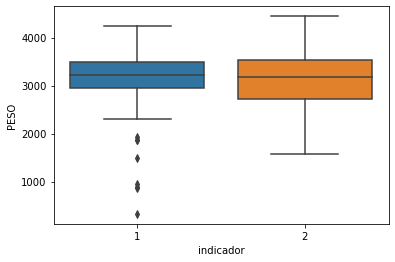

In [31]:
df_preg7 = df_general[(df_general.indicador == '1') | (df_general.indicador == '2')]
df_preg7_1 = df_preg7[(df_preg7.PESO != 9999)]
g_indicador_PESO = sns.boxplot(x='indicador', y='PESO', data=df_preg7_1)

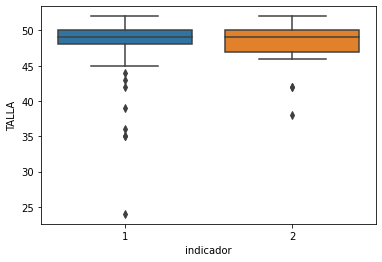

In [32]:
df_preg7_2 = df_preg7[(df_preg7.TALLA != 99)]
g_indicador_TALLA = sns.boxplot(x='indicador', y='TALLA', data=df_preg7_2)
plt.show()

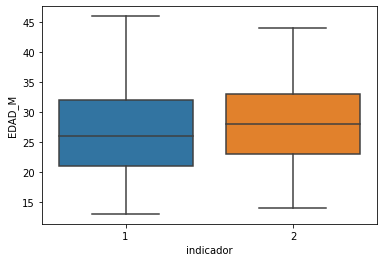

In [33]:
g_indicador_EDAD_M = sns.boxplot(x='indicador', y='EDAD_M', data=df_preg7)
plt.show()

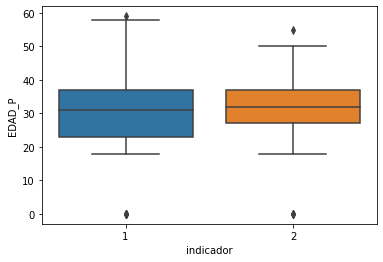

In [34]:
df_preg7_3 = df_preg7[(df_preg7.EDAD_P < 70)]
g_indicador_EDAD_P = sns.boxplot(x='indicador', y='EDAD_P', data=df_preg7_3)
plt.show()

# Pregunta 8.

Se agrupan las categorías según el tipo de Establecimiento para cumplir la rúbrica. Otra manera de poder ordenarlos 
es ocupando la variable LOCAL_PART según el documento [del MINSAL](
https://repositoriodeis.minsal.cl/BDPublica/EsquemaRegistroNacimientos.pdf) 

Las categorías son:

* 3 para Hospitales.
* 4 para Clínicas.
* 5 para otros.

Podemos notar que los datos son asimétricos ya que se nota una gran frecuencia de nacimientos en Hospitales vs los otros
tipos de establecimientos. Podemos inferir entonces que la mayoría de los chilenos nace en un hospital y menos de la
mitad de estos lo hacen en una clínica. Otros centros representan una frecuencia casi despreciable vs el grupo 3 y 4.

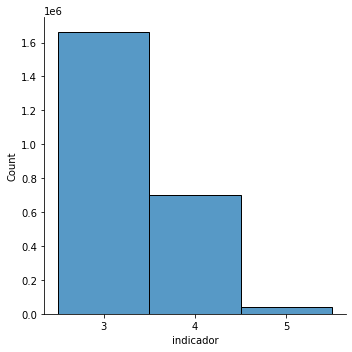

In [35]:
df_preg8 = df_general[(df_general.indicador == '3') | (df_general.indicador == '4') | (df_general.indicador == '5')]
sns.displot(df_preg8['indicador'])
plt.show()

# Pregunta 9.

Para el cálculo del intervalo de confianza se utiliza la función interval del módulo Scipy de la librería Stats, ya
que por lo indicado en rúbrica se toma el supuesto que son distribuidos de manera normal.

Según estos resultados obtenemos los intervalos de confianza para la variable TALLA de
(49.36214187378248, 49.37036414499677) y para la variable PESO (3325.952812290933, 3327.49922931851).

Por lo tanto podemos inferir que los datos que están fuera de estos intervalos se consideran potencialmente atípicos,
por lo que que dependiendo del tipo de análisis que se realice podemos considerarlos o no.

En lo relacionado a los rangos intercuartiles para la variable TALLA, estos valores se encuentran entre 48 y 51,
diferente a lo entregado por el intervalo de confianza. aunque sin embargo y dependiendo de la pregunta a responder se
podrá ocupar un método u otro.

Con respecto a la variable PESO, sus valores intercuartiles se encuentran entre 3040 y 3660; quizás es aquí en donde
más difiera un resultado de un método sobre otro, por lo se recomienda escoger el que responda de mejor manera la
pregunta asociada.

[Fuente](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)

In [36]:
IC95_TALLA = st.t.interval(0.95, len(df_general['TALLA']), loc=df_general['TALLA'].mean(),
                           scale=df_general['TALLA'].sem())
IC95_TALLA

(49.36214187378248, 49.37036414499677)

In [37]:
IC95_PESO = st.t.interval(0.95, len(df_general['PESO']), loc=df_general['PESO'].mean(), scale=df_general['PESO'].sem())
IC95_PESO

(3325.952812290933, 3327.49922931851)

In [38]:
# con un describe obtengo inmediatamente el Q1 y el Q3.
df_general['TALLA'].describe()

count    2.429064e+06
mean     4.936625e+01
std      3.269136e+00
min      1.600000e+01
25%      4.800000e+01
50%      5.000000e+01
75%      5.100000e+01
max      9.900000e+01
Name: TALLA, dtype: float64

In [39]:
df_general['PESO'].describe()

count    2.429064e+06
mean     3.326726e+03
std      6.148480e+02
min      1.100000e+02
25%      3.040000e+03
50%      3.350000e+03
75%      3.660000e+03
max      9.999000e+03
Name: PESO, dtype: float64

# Pregunta 10.

Para determinar las características de los bebés, primero que todo se crean dos nuevos df con las características
solicitadas, es decir, para edades mayores a 40 y edades de la Madre menores a 18 años.

Luego de esto y aplicando la función describe, podemos identificar el comportamiento de algunas de las características
como son PESO, TALLA y SEMANAS, de esta manera se identifica si la edad tiene influencia sobre esta variables.

En estas últimas características podemos identificar que para las madres menores a 18 años el PESO de sus bebés tiene
un mínimo de 3.04 y un máximo de 3.65 kilos para la información entre el Q1 y el Q3.

Para las madres sobre 40 y la variables PESO se identifica que el rango entre Q1 y Q3 va desde los 2.9 kilos hasta los
3.6 kilos. 

Se puede notar que al menos en lo referente a los rangos intercuartiles no existe una mayor diferencia entre aquellas
madres que tiene bajo 18 y aquellas que tiene sobre 40.

Con respecto al promedio entre ambas podemos notar que tampoco existe una mayor diferencia ya que por el lado de la
madre menor a 18 años el promedio se encuentra en 3.29 kilos y en las madres de 40 en 3.31 kilos. 

En lo referente a las semanas de gestación podemos notar que el rango se encuentra entre 38 y 40 semanas para las
madres menores a 18 y entre 38 y 39 para las madres sobre 40; por lo que nuevamente no se notan mayores diferencias.

Por último y lo que guarda relación con la TALLA indica que para madres menores a 18 años la TALLA del bebé va entre
48 y 51 kilos y para las madres sobre 40 años también entre los 48 y 51 años.

Por lo tanto se puede concluir que indistintamente de las edades estudiadas el hijo nace prácticamente con las mismas
características, por lo que no se podría considerar un impedimento ser madre a los 40 años.

In [40]:
# Nuevos df que identifican las características solicitadas.
df_madre_menor_18 = df_general[(df_general.EDAD_M < 18)]
df_madre_mayor_40 = df_general[(df_general.EDAD_M > 40)]

In [41]:
# Describe del PESO del bebé para madres menores a 18 años.
df_madre_menor_18.PESO.describe()

count    136677.000000
mean       3254.420458
std         578.564986
min         200.000000
25%        2990.000000
50%        3290.000000
75%        3580.000000
max        9999.000000
Name: PESO, dtype: float64

In [42]:
# Describe del PESO del bebé para madres mayores a 40 años.
df_madre_mayor_40.PESO.describe()

count    60439.000000
mean      3299.240391
std        850.591355
min        200.000000
25%       2950.000000
50%       3305.000000
75%       3645.000000
max       9999.000000
Name: PESO, dtype: float64

In [43]:
# Describe para SEMANAS para madres menores a 18 años.
df_madre_menor_18.SEMANAS.describe()

count    136677.000000
mean         38.638791
std           2.857407
min          17.000000
25%          38.000000
50%          39.000000
75%          40.000000
max          99.000000
Name: SEMANAS, dtype: float64

In [44]:
# Describe para SEMANAS para madres mayores a 40 años.
df_madre_mayor_40.SEMANAS.describe()

count    60439.000000
mean        38.458346
std          5.651070
min         17.000000
25%         38.000000
50%         38.000000
75%         39.000000
max         99.000000
Name: SEMANAS, dtype: float64

In [45]:
# Describe para TALLA para madres menores a 18 años.
df_madre_menor_18.TALLA.describe()

count    136677.000000
mean         49.243969
std           3.099348
min          16.000000
25%          48.000000
50%          50.000000
75%          51.000000
max          99.000000
Name: TALLA, dtype: float64

In [46]:
# Describe para TALLA para madres mayores a 40 años.
df_madre_mayor_40.TALLA.describe()


count    60439.000000
mean        49.299145
std          5.216177
min         18.000000
25%         48.000000
50%         49.000000
75%         51.000000
max         99.000000
Name: TALLA, dtype: float64